In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# preprocessing 
# convert the catagorical variable to dummy variable 
tips = pd.get_dummies(tips, drop_first=True)

# select the features and target variable
X = tips.drop('tip', axis=1)  # Changed from 'tip_percentage' to 'tip'
y = tips['tip']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Fixed typo in 'metrics'

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print('Mean Squared Error:', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 11.0736 - mae: 2.9463
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 8.5659 - mae: 2.5077
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 6.4683 - mae: 2.0879
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 4.6752 - mae: 1.6891
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 3.2572 - mae: 1.3589
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 2.2566 - mae: 1.1059
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.6765 - mae: 0.9816
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4098 - mae: 0.9222
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3211 - mae: 0.8996
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2570 - mae: 0.8715
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2112

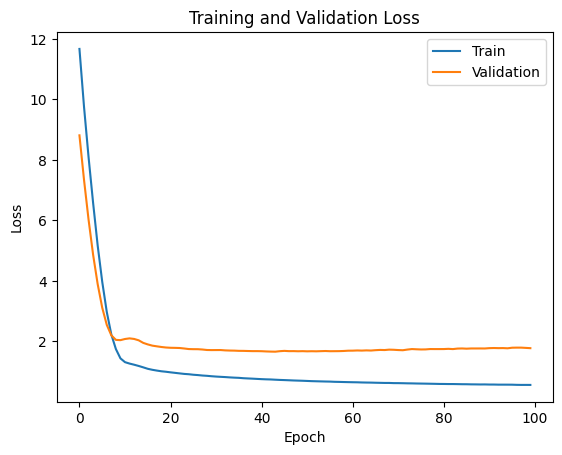

In [9]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


# complete the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


# evaluate the model ( using mean squared error)
loss = model.evaluate(X_test, y_test, verbose=0)

# plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc= 'upper right')
plt.show()

# Early stopping of Epochs

Mean Squared Error: 1.1274709701538086


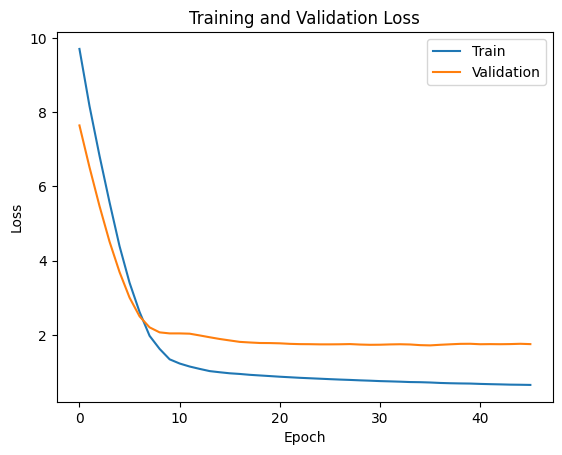

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)#output for regression
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# define the callback function
early_stopping = EarlyStopping(patience=10)

# train the model with callback fucntion
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss)

# plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc= 'upper right')
plt.show()